In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path


* Howto Visuals for boxplots: https://stackoverflow.com/questions/35160956/pandas-boxplot-set-color-and-properties-for-box-median-mean

In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
def generateFilename(bmtuple):
    fname = './runtime_csv/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryruntimes.csv"

def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra

## 1. Runtime Boxplots: Tryout

* Note as can be seen in notebook Rev1_12 runtimes are discarded when the engine crashes!

In [4]:
def generateFilenameRuntimesCorrect(bmtuple):
    fname = './runtime_csv_correct/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryruntimes_correct.csv"

In [5]:
tuples_Watdiv10M = [('Blazegraph',1,32,'Watdiv10M','Default',''), \
             ('GraphDB',1,32,'Watdiv10M','Default',''), \
             ('ES',1,32,'Watdiv10M','Default',''), \
             ('Virtuoso',1,32,'Watdiv10M','Default','')]

tuples_Watdiv100M = [('Blazegraph',1,32,'Watdiv100M','Default',''), \
             ('GraphDB',1,32,'Watdiv100M','Default',''), \
             ('ES',1,32,'Watdiv100M','Default',''), \
             ('Virtuoso',1,32,'Watdiv100M','Default','')]

tuples_Watdiv1000M_32 = [('Blazegraph',1,32,'Watdiv1000M','Default',''), \
             ('GraphDB',1,32,'Watdiv1000M','Default',''), \
             ('ES',1,32,'Watdiv1000M','Default',''), \
             ('Virtuoso',1,32,'Watdiv1000M','Default','')]


tuples_Watdiv1000M_64 = [('Blazegraph',1,64,'Watdiv1000M','Default',''), \
             ('GraphDB',1,64,'Watdiv1000M','Default',''), \
             ('ES',1,64,'Watdiv1000M','Default',''), \
             ('Virtuoso',1,64,'Watdiv1000M','Default','')]

tuples_Watdiv1000M_64_Opt = [('Blazegraph',1,64,'Watdiv1000M','Optimized',''), \
             ('GraphDB',1,64,'Watdiv1000M','Optimized',''), \
             ('Virtuoso',1,64,'Watdiv1000M','Optimized','')]

tuples_N3_Watdiv1000M = [('ES',3,32,'Watdiv1000M','Default',''), \
             ('Virtuoso',3,32,'Watdiv1000M','Default','')]

tuples_Other_Watdiv100M = [('Fuseki',1,64,'Watdiv100M','Default',''), \
             ('FluidOps',3,64,'Watdiv100M','Default',''), \
             ('LDF',1,64,'Watdiv100M','Default',''), \
             ('LDF',3,64,'Watdiv100M','Default','')]

tuples_Other_Watdiv1000M = [('Fuseki',1,64,'Watdiv1000M','Default',''), \
             ('FluidOps',1,64,'Watdiv1000M','Default',''), \
             ('FluidOps',3,64,'Watdiv1000M','Default',''), \
             ('LDF',1,64,'Watdiv1000M','Default',''), \
             ('LDF',3,64,'Watdiv1000M','Default','')]


tuples_Ontoforce = [('Blazegraph', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('ES', 1, 64, 'Ontoforce', 'Default', ''), \
              ('GraphDB', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 64, 'Ontoforce', 'Optimized', ''), \
              ('Virtuoso', 1, 32,'Ontoforce', 'Optimized', 'VWall'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '0'), \
              ('Virtuoso', 3, 64,'Ontoforce', 'Optimized', '2') \
             ]  





### A. Do we lose a lot queries by doing an inner join? Not a huge issue!

In [6]:
def how_many_events(tup):
    
    filename = generateFilenameRuntimesCorrect(tup)
    df = pd.read_csv(filename, header=0, sep='\t')
    
    sim = generateSimulationIDCompact(tup)
    info = "\t" +  str(df.shape)

    print(sim+info)
    return

for tup in tuples_Watdiv10M:
    how_many_events(tup)
print()

for tup in tuples_Watdiv100M:
    how_many_events(tup)
print()

for tup in tuples_Watdiv1000M_32:
    how_many_events(tup)
print()

for tup in tuples_Watdiv1000M_64:
    how_many_events(tup)
print()

for tup in tuples_Watdiv1000M_64_Opt:
    how_many_events(tup)
print()

for tup in tuples_N3_Watdiv1000M:
    how_many_events(tup)
print()

for tup in tuples_Other_Watdiv100M:
    how_many_events(tup)
print()

for tup in tuples_Other_Watdiv1000M:
    how_many_events(tup)
print()

for tup in tuples_Ontoforce:
    how_many_events(tup)
print()


Bla_N1_32_W10_Def	(4000, 6)
Gra_N1_32_W10_Def	(4000, 6)
ES_N1_32_W10_Def	(4000, 6)
Vir_N1_32_W10_Def	(3800, 6)

Bla_N1_32_W100_Def	(4000, 6)
Gra_N1_32_W100_Def	(4000, 6)
ES_N1_32_W100_Def	(2000, 6)
Vir_N1_32_W100_Def	(3800, 6)

Bla_N1_32_W1000_Def	(3998, 6)
Gra_N1_32_W1000_Def	(2000, 6)
ES_N1_32_W1000_Def	(2157, 6)
Vir_N1_32_W1000_Def	(3800, 6)

Bla_N1_64_W1000_Def	(800, 6)
Gra_N1_64_W1000_Def	(800, 6)
ES_N1_64_W1000_Def	(799, 6)
Vir_N1_64_W1000_Def	(760, 6)

Bla_N1_64_W1000_Opt	(800, 6)
Gra_N1_64_W1000_Opt	(800, 6)
Vir_N1_64_W1000_Opt	(760, 6)

ES_N3_32_W1000_Def	(3990, 6)
Vir_N3_32_W1000_Def	(3799, 6)

Fus_N1_64_W100_Def	(597, 6)
Flu_N3_64_W100_Def	(39, 6)
LDF_N1_64_W100_Def	(800, 6)
LDF_N3_64_W100_Def	(800, 6)

Fus_N1_64_W1000_Def	(51, 6)
Flu_N1_64_W1000_Def	(800, 6)
Flu_N3_64_W1000_Def	(4, 6)
LDF_N1_64_W1000_Def	(797, 6)
LDF_N3_64_W1000_Def	(800, 6)

Bla_N1_64_Ont_Opt	(54, 6)
ES_N1_64_Ont_Def	(2444, 6)
Gra_N1_64_Ont_Opt	(2084, 6)
Vir_N1_64_Ont_Opt	(2386, 6)
Vir_N1_32_Ont_Opt_VWall	

* Watdiv10M: C3 queries discarded for Virtuoso
* Watdiv100M: ES only has stress test results (no logs)
* Watdiv1000M: 
    - GraphDB only has stress test results (no logs)
    - ES crashed during the stress test 
    - Virtuoso C3 queries
* Watdiv1000M_64:
    - Virtuoso C3 queries
* Watdiv1000M_64_Opt:
    - Virtuoso C3 queries    
* Watdiv1000M_N3_64_Opt:
    - Virtuoso C3 queries   
* Other_Watdiv100M_64
    - Ok but Fuseki en Flu3 crashed
* Other_Watdiv1000M_64
    - Ok but Fuseki en Flu3 crashed
* Ontoforce:
    - Blazegraph Early Crash
    - Virtuoso, GraphDB, ES => all have sufficient queries to make comparisons
    - also Virtuoso N3_0 ok
    - Vir_N1_32 Ontoforce is also but small changes in hardware... (can we compare?)

## 2. Runtimes: Different Dataset sizes

* Important: INNER JOINS per simulation so only correct queries, solved by ALL engines!
* Challenge: if we want to do cross simulation comparison we cannot perform a join! 

In [7]:
tuple_collection_datascaling = [tuples_Watdiv10M, tuples_Watdiv100M, tuples_Watdiv1000M_32]
tuple_collection_verticalscaling = [tuples_Watdiv1000M_32, tuples_Watdiv1000M_64, tuples_Watdiv1000M_64_Opt]

def generate_runtime_comparison_DF(thread_type, bm_tuples):
    interesting_cols = ['query_name', 'thread_type', 'median_runtime']
    df_tot = None

    for bm_tuple in bm_tuples:
        
        filename = generateFilenameRuntimesCorrect(bm_tuple)
        print(filename+ ": " + str(os.path.isfile(filename)))

        df = pd.read_csv(filename, sep='\t')[interesting_cols]
        df = df.rename(columns={'median_runtime': generateSimulationIDCompact(bm_tuple)})
        #print(df.shape)
        
        df = df[df['thread_type'] == thread_type]
        #print(df.shape)

        if df_tot is None:
            df_tot = df
        else:
            df_tot = pd.merge(df_tot, df, how='inner', on=['query_name', 'thread_type'])
            
        #df_tot = df_tot.fillna(timeout)
        
        #print(df_tot.describe())

        
    #df_all = df_tot.drop(['query_name','thread_type'])

    return df_tot

df_tot = generate_runtime_comparison_DF('stress', tuples_Watdiv10M)
print(df_tot.shape)

./runtime_csv_correct/Blazegraph_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
(1900, 6)


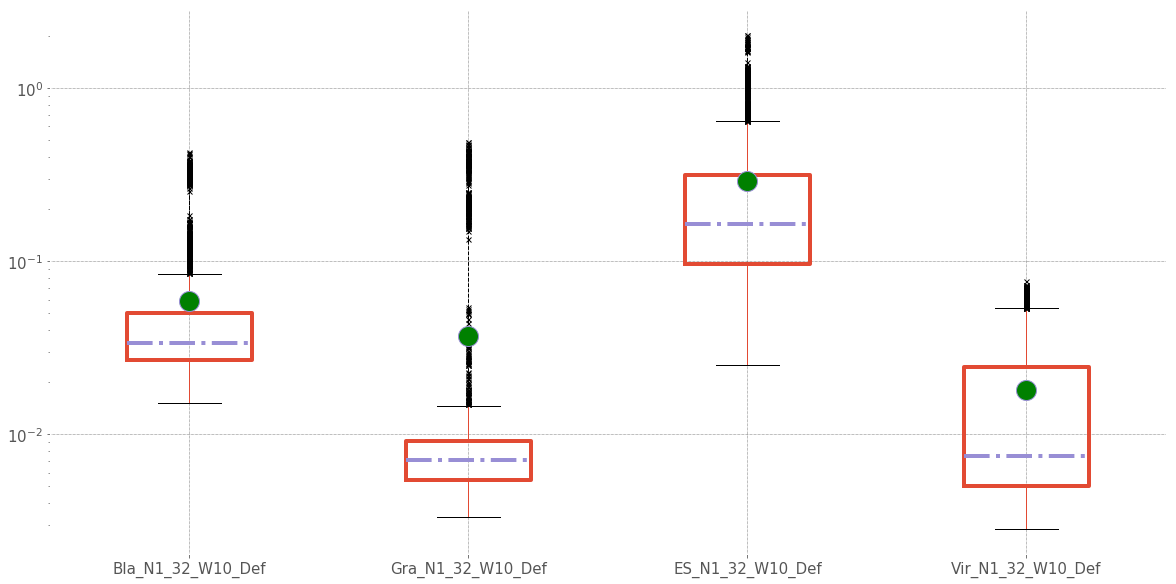

In [8]:
# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='-', linewidth=4, color='black')
medianprops = dict(linestyle='-.', linewidth=4, color='blue')

flierprops = dict(marker='x', markerfacecolor='black', markersize=5,
                  linestyle='--',)

meanpointprops = dict(marker='o', markeredgecolor=None,
                      markerfacecolor='green', markersize=20)
meanlineprops = dict(linestyle='--', linewidth=10, color='purple')


#ax = df.boxplot(column=['V1'],
#                by=df.index.get_level_values('datetime').year,
#                showfliers=False, showmeans=True,
#                boxprops=boxprops,
#                medianprops=medianprops)



df_tot.plot(kind='box', figsize=(20,10), logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

./runtime_csv_correct/Blazegraph_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M

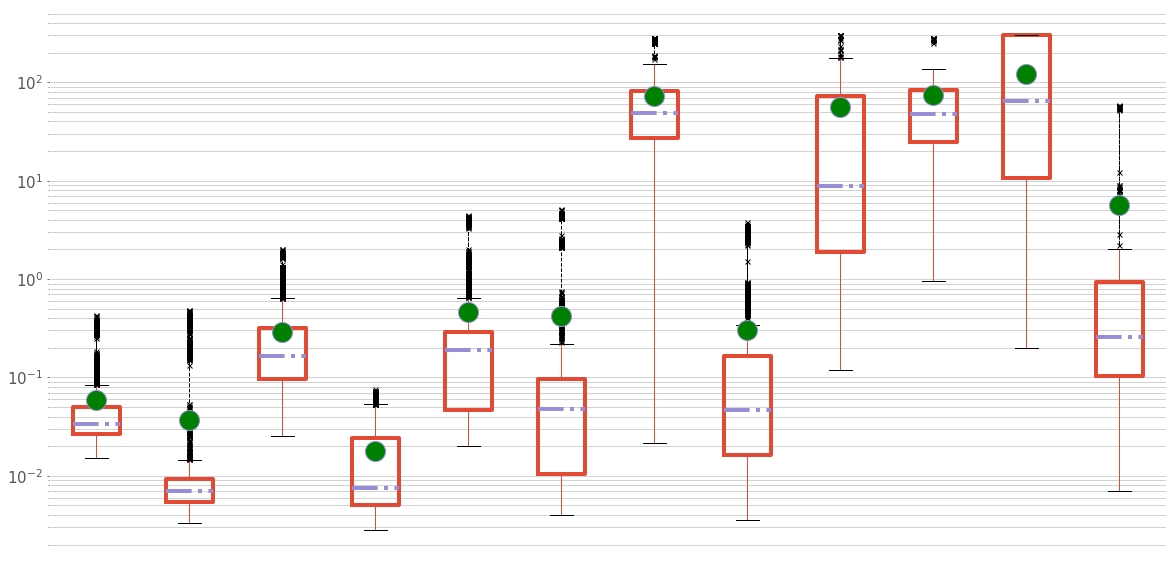

In [10]:
df10 = generate_runtime_comparison_DF('stress', tuples_Watdiv10M)
df100 = generate_runtime_comparison_DF('stress', tuples_Watdiv100M)
df1000_32 = generate_runtime_comparison_DF('stress', tuples_Watdiv1000M_32)

fig, ax = plt.subplots(1,1, figsize=(20,10))

df_conc = pd.concat([df10, df100, df1000_32], axis=1)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

plt.grid(b=True, which='both', color='0.65',linestyle='-')
ax.set_xticks([]) 

fname= './img/runtimeboxplots/WatdivNoSQLDataScaling'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)


## Postprocessing:

- One color per store!! Connect means with a line in same color (everything can be in same color)
- Remove xlabels -> Add Legend with Store names
- Lines to separate the different simulations


## 2. Runtime Boxplots


### A Watdiv10M

./runtime_csv_correct/Blazegraph_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True


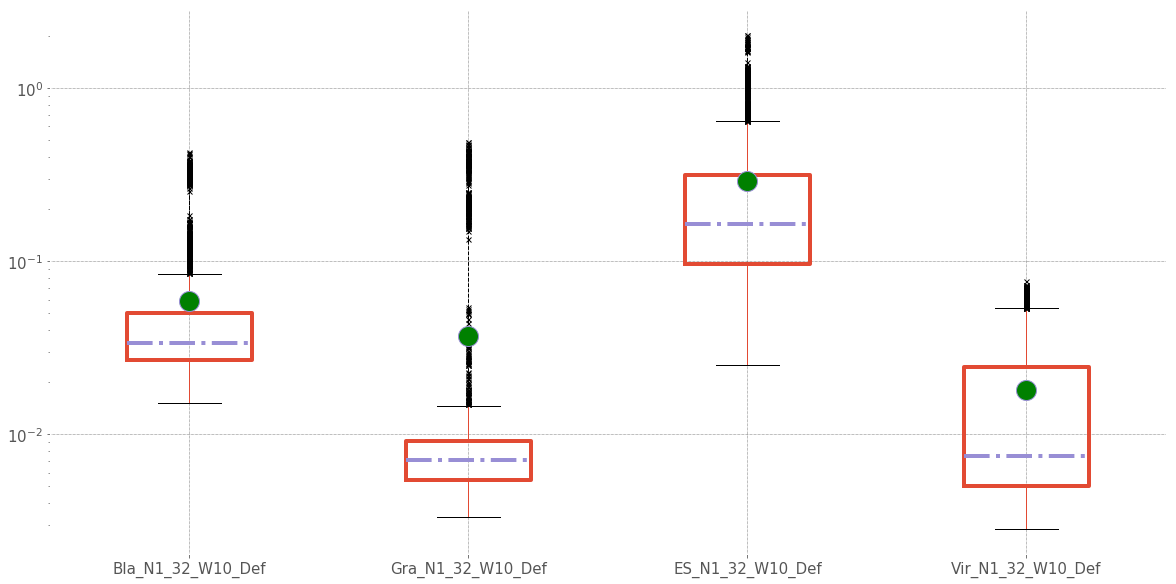

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_conc = generate_runtime_comparison_DF('stress', tuples_Watdiv10M)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

### B Watdiv100M

./runtime_csv_correct/Blazegraph_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True


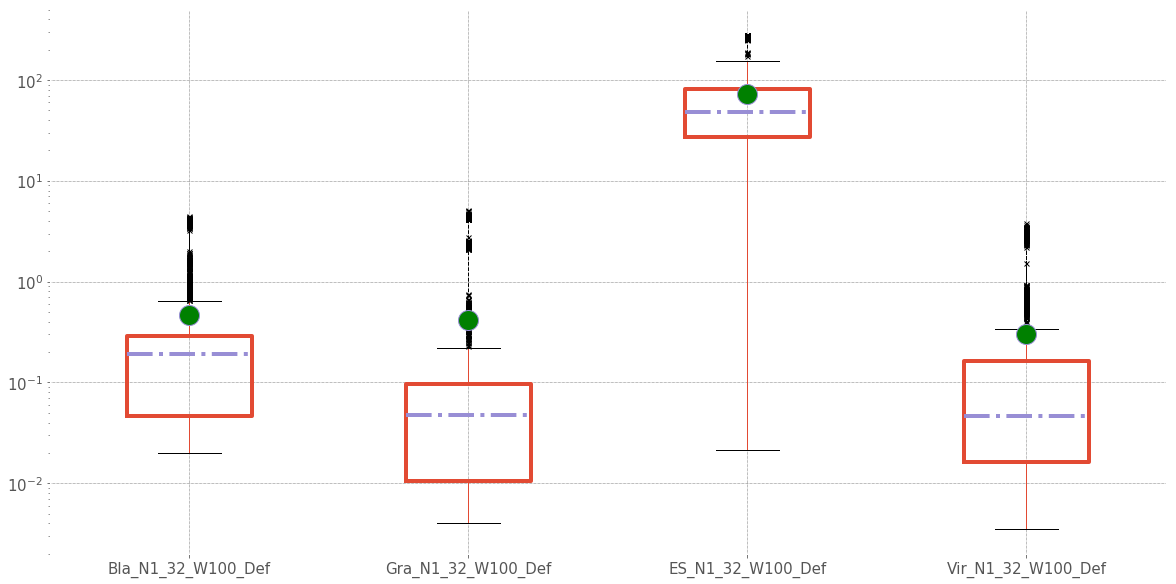

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_conc = generate_runtime_comparison_DF('stress', tuples_Watdiv100M)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

### C Watdiv1000M 32 Default

./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True


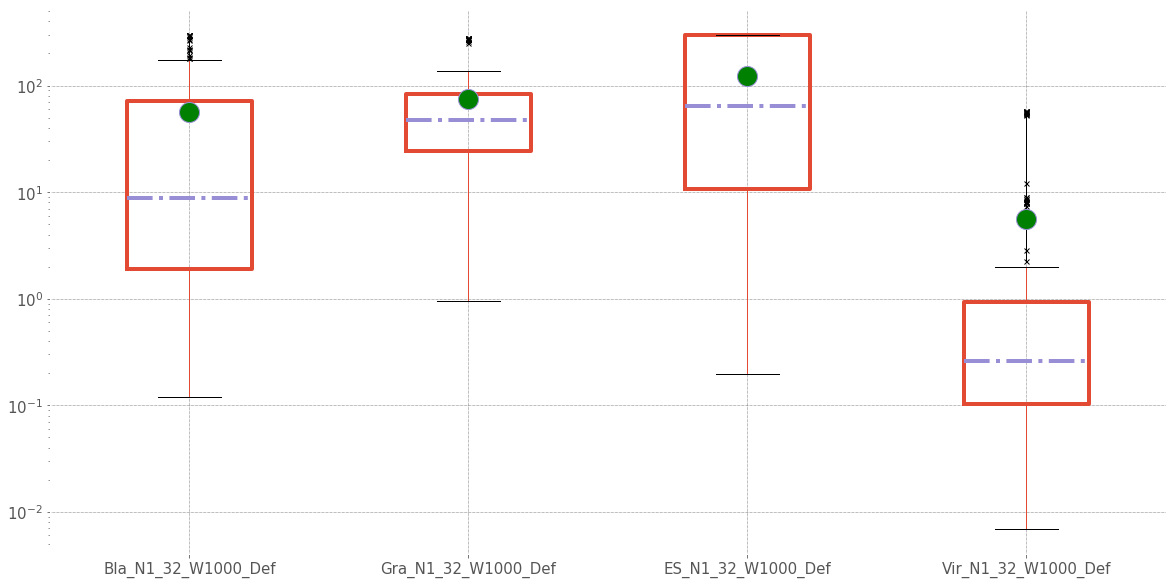

In [13]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_conc = generate_runtime_comparison_DF('stress', tuples_Watdiv1000M_32)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)



### D Watdiv1000M 64


./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True


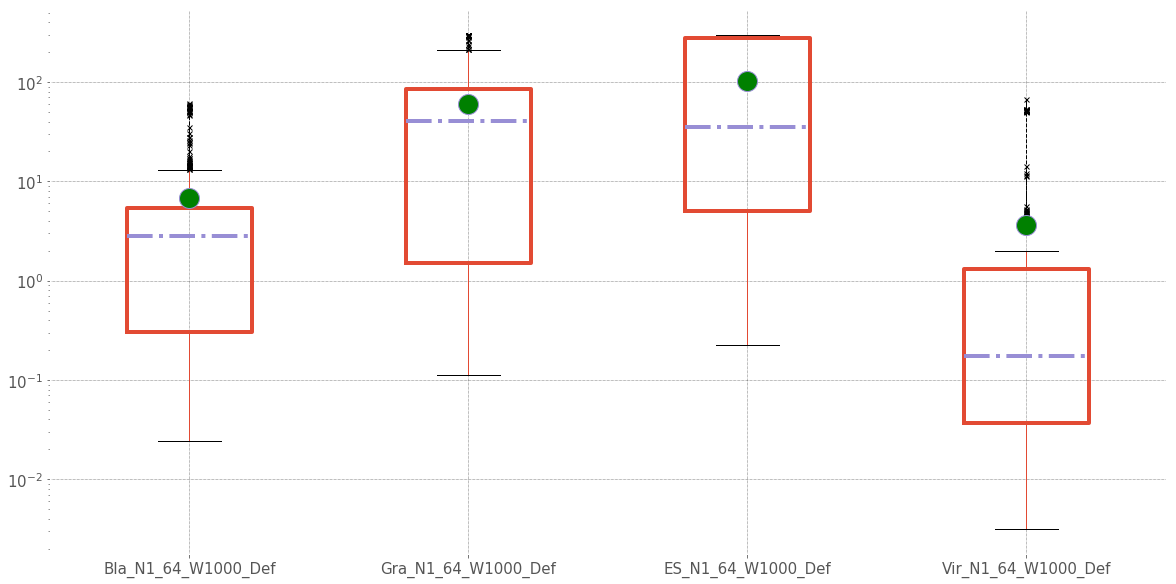

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_conc = generate_runtime_comparison_DF('stress', tuples_Watdiv1000M_64)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)



### E Watdiv1000M 64 Optimized


./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True


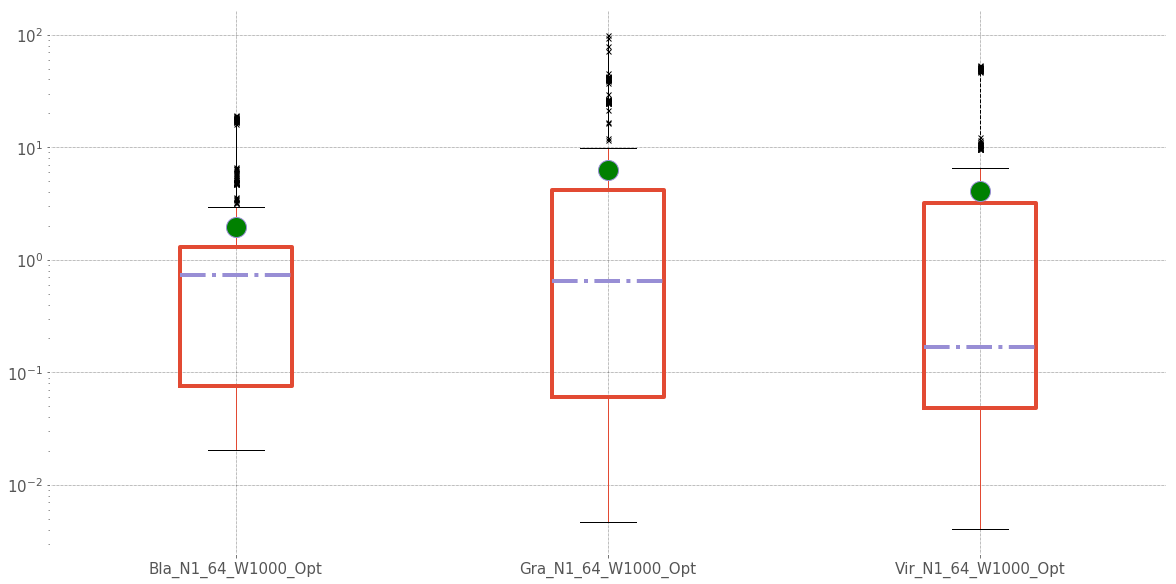

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_conc = generate_runtime_comparison_DF('stress', tuples_Watdiv1000M_64_Opt)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)



### F Watdiv1000M 32 Default 3 Nodes
 

./runtime_csv_correct/ES_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True


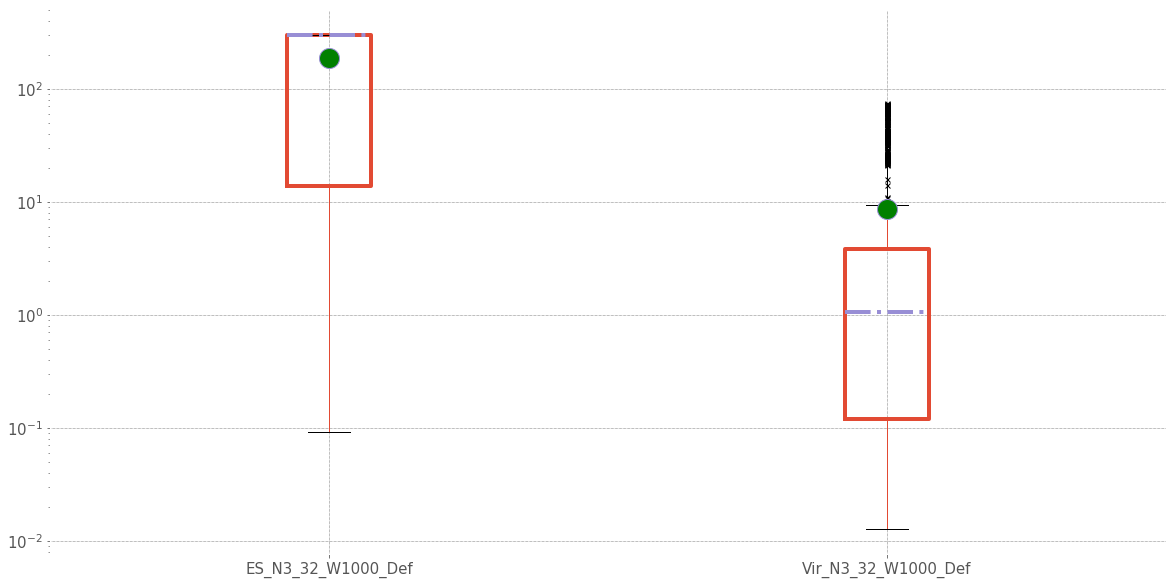

In [16]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_conc = generate_runtime_comparison_DF('stress', tuples_N3_Watdiv1000M)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

### G Watdiv100M 64 Default Scaleout approaches


In [17]:
#fig, ax = plt.subplots(1,1, figsize=(20,10))
#df_conc = generate_runtime_comparison_DF('stress', tuples_Other_Watdiv100M)
#df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
#           flierprops=flierprops, meanprops=meanpointprops)

#NOT ENOUGH COMMON QUERIES IN JOIN

### H Watdiv1000M 64 Default Scaleout approaches


In [18]:
#fig, ax = plt.subplots(1,1, figsize=(20,10))
#df_conc = generate_runtime_comparison_DF('stress', tuples_Other_Watdiv1000M)
#df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
#           flierprops=flierprops, meanprops=meanpointprops)

#NOT ENOUGH COMMON QUERIES IN JOIN

./runtime_csv_correct/Blazegraph_N1_64_Ontoforce_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Ontoforce_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Ontoforce_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Ontoforce_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Ontoforce_Optimized_VWall_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_64_Ontoforce_Optimized_0_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_64_Ontoforce_Optimized_2_queryruntimes_correct.csv: True


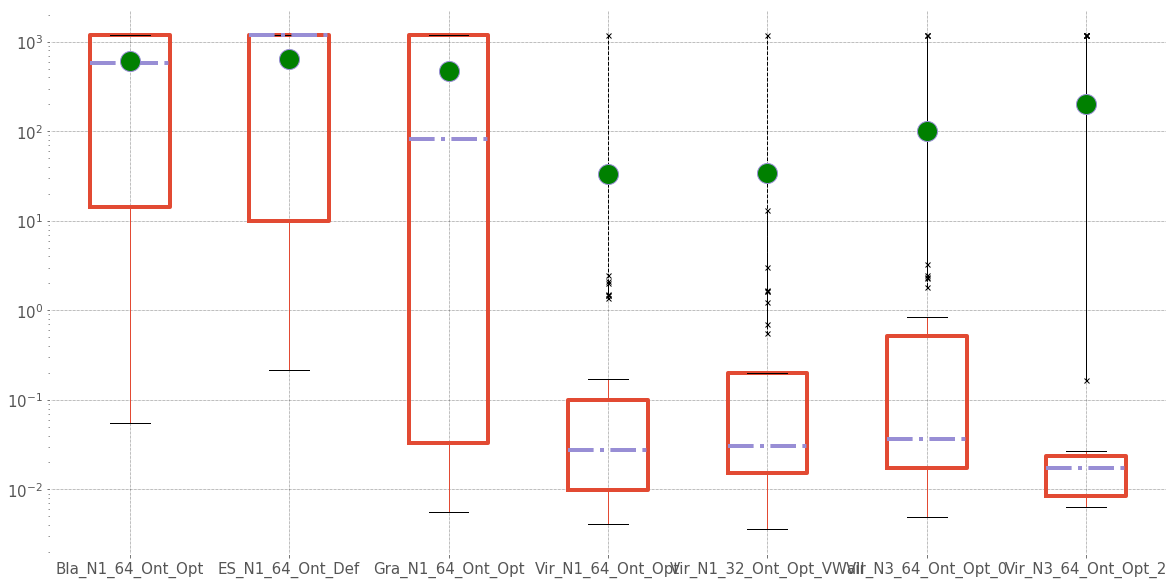

In [19]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
df_conc = generate_runtime_comparison_DF('warmup', tuples_Ontoforce)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

#NOT ENOUGH COMMON QUERIES IN JOIN







## 3. Vertical Scaling





./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Optimized_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Blazegraph_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True


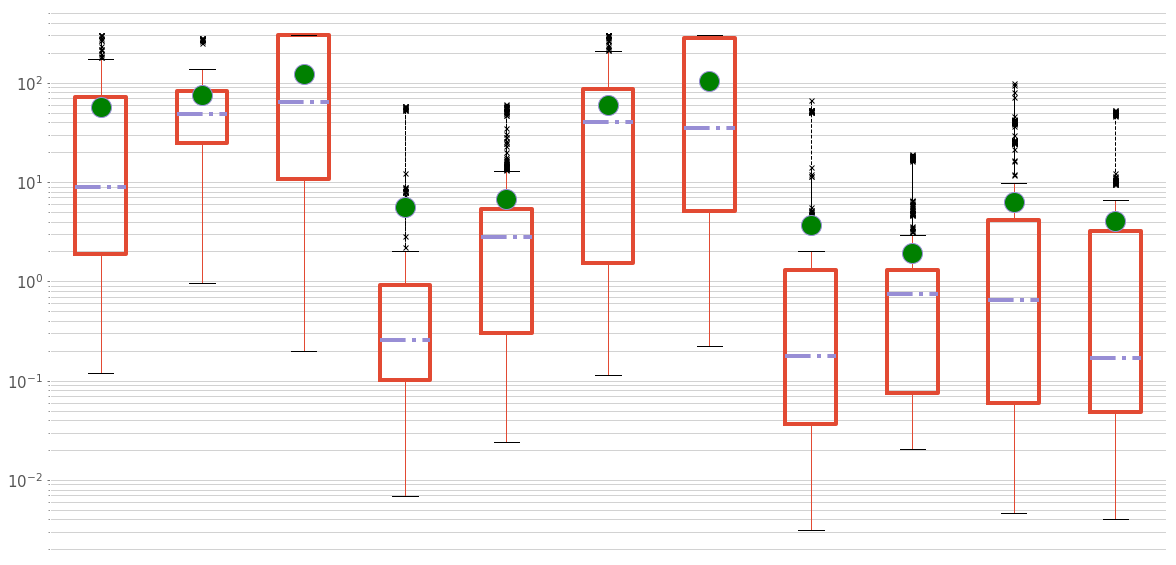

In [21]:
df1000_64_opt = generate_runtime_comparison_DF('stress', tuples_Watdiv1000M_64_Opt)
df1000_64 = generate_runtime_comparison_DF('stress', tuples_Watdiv1000M_64)
df1000_32 = generate_runtime_comparison_DF('stress', tuples_Watdiv1000M_32)

fig, ax = plt.subplots(1,1, figsize=(20,10))

df_conc = pd.concat([df1000_32, df1000_64, df1000_64_opt], axis=1)
df_conc.plot(kind='box', ax=ax, logy=True, showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

plt.grid(b=True, which='both', color='0.65',linestyle='-')
ax.set_xticks([]) 

fname= './img/runtimeboxplots/WatdivVerticalScaling'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)


# 4. Additional Numeric Data with the boxplots

In [22]:
def median_runtime(tuples, ttype):
    df_conc = generate_runtime_comparison_DF(ttype, tuples)
    
    
    
    print(tuples)
    print('median')
    print(df_conc.median())
    print('mean')
    print(df_conc.mean())
    
    return

def errorstimeouts(tup, ttype):
    filename = generateFilenameRuntimesCorrect(tup)
    df = pd.read_csv(filename, sep='\t')
    dff =df[df['thread_type'] == ttype]
    
    s = dff['success'].sum()
    e = dff['errors'].sum()
    t = dff['timeouts'].sum()
    tot = s+e+t

    sim = generateSimulationIDCompact(tup)

    if tot == 0:
        print(sim + ":\tSuccess: "+str(0.0) +"\tError: "+str(0.0) +"\tTimeout: "+str(0.0) )
    else:    
        print(sim + ":\tSuccess: "+str(100*s/tot)[:4] +"\tError: "+str(100*e/tot)[:4] +"\tTimeout: "+str(100*t/tot)[:4] )

    return

## A Median & Average Runtime

In [23]:
median_runtime(tuples_Watdiv10M, 'stress')
print()
median_runtime(tuples_Watdiv100M, 'stress')
print()
median_runtime(tuples_Watdiv1000M_32, 'stress')    
print()
median_runtime(tuples_Watdiv1000M_64, 'stress')
print()
median_runtime(tuples_Watdiv1000M_64_Opt, 'stress')
print()    
median_runtime(tuples_N3_Watdiv1000M, 'stress')
print()
median_runtime(tuples_Other_Watdiv100M[2:], 'stress')
print()
median_runtime(tuples_Other_Watdiv1000M[3:], 'stress')
print()
median_runtime(tuples_Ontoforce[1:-1], 'stress')
    
    

./runtime_csv_correct/Blazegraph_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N1_32_Watdiv10M_Default_queryruntimes_correct.csv: True
[('Blazegraph', 1, 32, 'Watdiv10M', 'Default', ''), ('GraphDB', 1, 32, 'Watdiv10M', 'Default', ''), ('ES', 1, 32, 'Watdiv10M', 'Default', ''), ('Virtuoso', 1, 32, 'Watdiv10M', 'Default', '')]
median
Bla_N1_32_W10_Def    0.033637
Gra_N1_32_W10_Def    0.007062
ES_N1_32_W10_Def     0.163703
Vir_N1_32_W10_Def    0.007511
dtype: float64
mean
Bla_N1_32_W10_Def    0.058546
Gra_N1_32_W10_Def    0.036882
ES_N1_32_W10_Def     0.290875
Vir_N1_32_W10_Def    0.018063
dtype: float64

./runtime_csv_correct/Blazegraph_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/GraphDB_N1_32_Watdiv100M_Default_queryruntimes_correct.csv: True
./run

## B Errors & Timeout percentage

In [24]:
for tup in tuples_Watdiv10M:
    errorstimeouts(tup, 'stress')
print()
for tup in tuples_Watdiv100M:
    errorstimeouts(tup, 'stress')
print()
for tup in tuples_Watdiv1000M_32:
    errorstimeouts(tup, 'stress')    
print()
for tup in tuples_Watdiv1000M_64:
    errorstimeouts(tup, 'stress')
print()
for tup in tuples_Watdiv1000M_64_Opt:
    errorstimeouts(tup, 'stress')   
print()
    
for tup in tuples_N3_Watdiv1000M:
    errorstimeouts(tup, 'stress')   
print()

for tup in tuples_Other_Watdiv100M:
    errorstimeouts(tup, 'stress')   
print()

for tup in tuples_Other_Watdiv1000M:
    errorstimeouts(tup, 'stress')   
print()

for tup in tuples_Ontoforce:
    errorstimeouts(tup, 'stress')   
print()       
    

Bla_N1_32_W10_Def:	Success: 100.	Error: 0.0	Timeout: 0.0
Gra_N1_32_W10_Def:	Success: 100.	Error: 0.0	Timeout: 0.0
ES_N1_32_W10_Def:	Success: 100.	Error: 0.0	Timeout: 0.0
Vir_N1_32_W10_Def:	Success: 100.	Error: 0.0	Timeout: 0.0

Bla_N1_32_W100_Def:	Success: 100.	Error: 0.0	Timeout: 0.0
Gra_N1_32_W100_Def:	Success: 100.	Error: 0.0	Timeout: 0.0
ES_N1_32_W100_Def:	Success: 100.	Error: 0.0	Timeout: 0.0
Vir_N1_32_W100_Def:	Success: 100.	Error: 0.0	Timeout: 0.0

Bla_N1_32_W1000_Def:	Success: 88.3	Error: 0.0	Timeout: 11.6
Gra_N1_32_W1000_Def:	Success: 100.	Error: 0.0	Timeout: 0.0
ES_N1_32_W1000_Def:	Success: 67.2	Error: 0.0	Timeout: 32.7
Vir_N1_32_W1000_Def:	Success: 99.9	Error: 0.04	Timeout: 0.0

Bla_N1_64_W1000_Def:	Success: 95.0	Error: 0.0	Timeout: 5.0
Gra_N1_64_W1000_Def:	Success: 79.6	Error: 0.0	Timeout: 20.4
ES_N1_64_W1000_Def:	Success: 72.5	Error: 0.0	Timeout: 27.4
Vir_N1_64_W1000_Def:	Success: 100.	Error: 0.0	Timeout: 0.0

Bla_N1_64_W1000_Opt:	Success: 100.	Error: 0.0	Timeout: 0.0
Gra_

# 5 New plot for horizontal Scaling


[('Virtuoso', 1, 32, 'Watdiv1000M', 'Default', ''), ('Virtuoso', 3, 32, 'Watdiv1000M', 'Default', '')]
[('ES', 1, 32, 'Watdiv1000M', 'Default', ''), ('ES', 3, 32, 'Watdiv1000M', 'Default', '')]
[('LDF', 1, 64, 'Watdiv1000M', 'Default', ''), ('LDF', 3, 64, 'Watdiv1000M', 'Default', '')]
./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/LDF_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/LDF_N3_64_Watdiv1000M_Default_queryruntimes_correct.csv: True


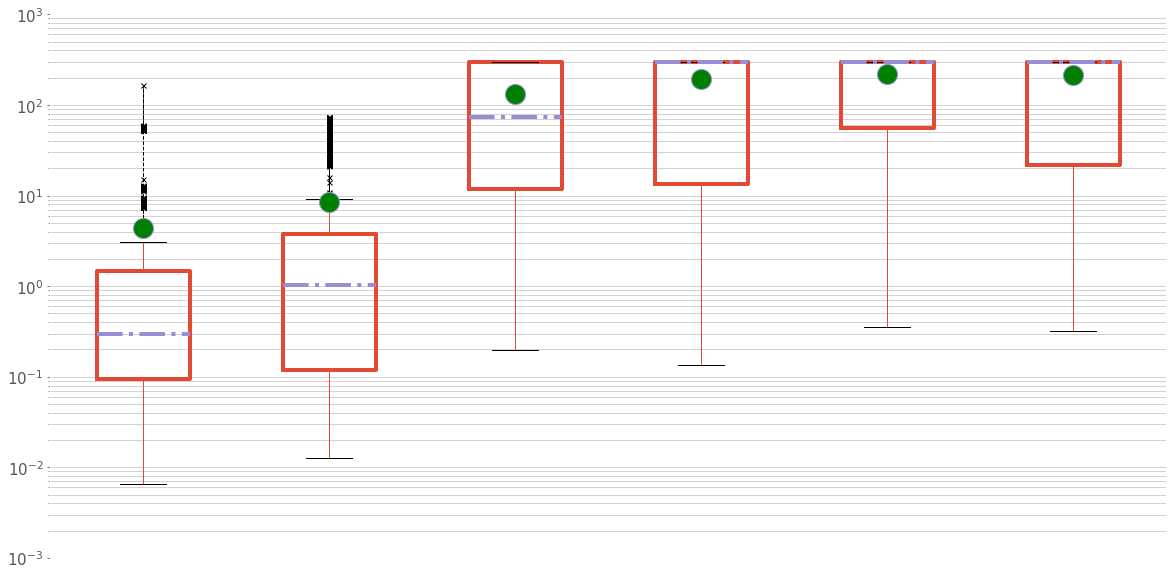

In [26]:
pair_virt = [tuples_Watdiv1000M_32[3], tuples_N3_Watdiv1000M[1]]
print(pair_virt)
pair_es = [tuples_Watdiv1000M_32[2], tuples_N3_Watdiv1000M[0]]
print(pair_es)
pair_ldf = [tuples_Other_Watdiv1000M[3], tuples_Other_Watdiv1000M[4]]
print(pair_ldf)

df_virt = generate_runtime_comparison_DF('stress', pair_virt)
df_es   = generate_runtime_comparison_DF('stress', pair_es)
df_ldf  = generate_runtime_comparison_DF('stress', pair_ldf)

fig, ax = plt.subplots(1,1, figsize=(20,10))

df_conc = pd.concat([df_virt, df_es, df_ldf], axis=1)
df_conc.plot(kind='box', ax=ax, logy=True, ylim=[1e-3,1e+3], showmeans=True, boxprops=boxprops, medianprops=medianprops, \
           flierprops=flierprops, meanprops=meanpointprops)

plt.grid(b=True, which='both', color='0.65',linestyle='-')
ax.set_xticks([]) 

fname= './img/runtimeboxplots/WatdivHorizontalScaling'
plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)


In [27]:
median_runtime(pair_virt, 'stress')
print()

median_runtime(pair_es, 'stress')
print()

median_runtime(pair_ldf, 'stress')
print()


./runtime_csv_correct/Virtuoso_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/Virtuoso_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
[('Virtuoso', 1, 32, 'Watdiv1000M', 'Default', ''), ('Virtuoso', 3, 32, 'Watdiv1000M', 'Default', '')]
median
Vir_N1_32_W1000_Def    0.295139
Vir_N3_32_W1000_Def    1.040609
dtype: float64
mean
Vir_N1_32_W1000_Def    4.431931
Vir_N3_32_W1000_Def    8.545433
dtype: float64

./runtime_csv_correct/ES_N1_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/ES_N3_32_Watdiv1000M_Default_queryruntimes_correct.csv: True
[('ES', 1, 32, 'Watdiv1000M', 'Default', ''), ('ES', 3, 32, 'Watdiv1000M', 'Default', '')]
median
ES_N1_32_W1000_Def     74.091186
ES_N3_32_W1000_Def    300.000000
dtype: float64
mean
ES_N1_32_W1000_Def    132.011802
ES_N3_32_W1000_Def    191.478380
dtype: float64

./runtime_csv_correct/LDF_N1_64_Watdiv1000M_Default_queryruntimes_correct.csv: True
./runtime_csv_correct/LDF_N3_64_